# Projeto de estatística - Módulo 6 - Squad Amarelo

### Integrantes:
### - Daniel Ferreira
### - Fabio Cardoso Pasquini
### - Renato Nagamine

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from scipy.stats import norm, ttest_ind, f, t, chi2_contingency

### ANALISANDO E TRABALHANDO O DATAFRAME

In [5]:
arq = pd.read_csv('Family Income and Expenditure.csv')

In [6]:
arq.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1


In [7]:
arq.shape

(41544, 60)

In [8]:
# Colunas do nosso dataframe
for i in arq.columns:
    print(i)

Total Household Income
Region
Total Food Expenditure
Main Source of Income
Agricultural Household indicator
Bread and Cereals Expenditure
Total Rice Expenditure
Meat Expenditure
Total Fish and  marine products Expenditure
Fruit Expenditure
Vegetables Expenditure
Restaurant and hotels Expenditure
Alcoholic Beverages Expenditure
Tobacco Expenditure
Clothing, Footwear and Other Wear Expenditure
Housing and water Expenditure
Imputed House Rental Value
Medical Care Expenditure
Transportation Expenditure
Communication Expenditure
Education Expenditure
Miscellaneous Goods and Services Expenditure
Special Occasions Expenditure
Crop Farming and Gardening expenses
Total Income from Entrepreneurial Acitivites
Household Head Sex
Household Head Age
Household Head Marital Status
Household Head Highest Grade Completed
Household Head Job or Business Indicator
Household Head Occupation
Household Head Class of Worker
Type of Household
Total Number of Family members
Members with age less than 5 year old


In [9]:
# Dataframe organizado por região...
arq.Region.unique()

array(['CAR', 'Caraga', 'VI - Western Visayas', 'V - Bicol Region',
       ' ARMM', 'III - Central Luzon', 'II - Cagayan Valley',
       'IVA - CALABARZON', 'VII - Central Visayas',
       'X - Northern Mindanao', 'XI - Davao Region',
       'VIII - Eastern Visayas', 'I - Ilocos Region', 'NCR',
       'IVB - MIMAROPA', 'XII - SOCCSKSARGEN',
       'IX - Zasmboanga Peninsula'], dtype=object)

In [10]:
arq['Main Source of Income'].unique()

array(['Wage/Salaries', 'Other sources of Income',
       'Enterpreneurial Activities'], dtype=object)

In [11]:
arq['Household Head Highest Grade Completed'].unique()

array(['Teacher Training and Education Sciences Programs',
       'Transport Services Programs', 'Grade 3', 'Elementary Graduate',
       'Second Year High School', 'Third Year High School',
       'Business and Administration Programs', 'First Year College',
       'High School Graduate',
       'Other Programs in Education at the Third Level, First Stage, of the Type that Leads to an Award not Equivalent to a First University or Baccalaureate Degree',
       'Humanities Programs', 'First Year High School', 'Grade 6',
       'Grade 4', 'Engineering and Engineering Trades Programs',
       'Grade 2', 'Grade 5', 'Social and Behavioral Science Programs',
       'Agriculture, Forestry, and Fishery Programs', 'Health Programs',
       'Fourth Year College',
       'Engineering and Engineering trades Programs',
       'Second Year College', 'Third Year College', 'Grade 1',
       'No Grade Completed', 'Security Services Programs',
       'Basic Programs', 'First Year Post Secondary',
      

In [12]:
# Função para acertar a Escolaridade
def escolaridade(i):
    for item in ['Programs', 'College', 'Post']:
        if item in i:
            return 'Superior'
    for item in ['High School']:
        if item in i:
            return 'Medio'
    for item in ['Grade', 'Elementary', 'Preschool']:
        if item in i:
            return 'Fundamental'   

In [13]:
# Acertando a escolaridade com a função acima
arq['Schoolarship'] = arq['Household Head Highest Grade Completed'].apply(escolaridade)

In [14]:
# Acertando a fonte de rendimento da família... Salário ou Outro
arq['Income Source'] = arq['Main Source of Income'].apply(lambda x: 'Salary' if x == 'Wage/Salaries' else 'Other')

 ## $$  ============      MILESTONE 01      ============ $$

### 1.1 - Gerando amostra de 100 elementos:

Como os dados estão organizados por região, utilizaremos uma amostragem sistemática:

In [15]:
def amostra_sistematica(dados, n=30):
    N = len(dados)
    k = N//n
    start = np.random.randint(k)
    return dados.iloc[list(range(start, N, k))]

In [16]:
df = amostra_sistematica(arq,100)
df.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle,Schoolarship,Income Source
100,101045,CAR,97535,Enterpreneurial Activities,1,53284,47136,12395,9598,980,...,0,0,0,0,0,0,0,0,Fundamental,Other
515,116805,Caraga,79756,Wage/Salaries,0,31726,29010,10412,9290,520,...,0,0,0,2,0,0,0,0,Medio,Salary
930,125030,Caraga,74505,Enterpreneurial Activities,1,33311,12940,2160,17916,1555,...,0,0,0,1,0,0,0,0,Fundamental,Other
1345,124270,VI - Western Visayas,44448,Wage/Salaries,0,16219,13650,4070,8928,1460,...,0,0,0,1,0,0,0,1,Medio,Salary
1760,89140,V - Bicol Region,45604,Enterpreneurial Activities,0,18816,16471,3547,5729,2236,...,0,0,0,3,0,0,0,0,Medio,Other


### 1.2 - Análise descritiva de 10 variáveis quantitativas:

In [17]:
df_01 = df[['Total Household Income', 
            'Total Food Expenditure', 
            'Education Expenditure', 
            'Housing and water Expenditure', 
            'Medical Care Expenditure', 
            'Transportation Expenditure', 
            'Clothing, Footwear and Other Wear Expenditure', 
            'Total Income from Entrepreneurial Acitivites', 
            'Total Number of Family members', 
            'Total number of family members employed']]

In [18]:
df_01.describe().T

,count,mean,std,min,25%,50%,75%,max
Total Household Income,100.0,223002.41,243725.087663,41974.0,95092.75,137085.0,246002.00,1559930.0
Total Food Expenditure,100.0,77014.64,45123.501374,19651.0,45682.75,66385.0,92750.75,273116.0
Education Expenditure,100.0,6973.18,20702.204726,0.0,0.00,655.0,2887.50,136500.0
Housing and water Expenditure,100.0,32356.68,36814.136727,3948.0,13771.50,21564.0,38802.00,312120.0
Medical Care Expenditure,100.0,2130.16,3242.431669,0.0,246.00,816.5,2297.50,18610.0
Transportation Expenditure,100.0,9794.76,14170.088353,120.0,2053.50,5664.0,11616.00,104250.0
"Clothing, Footwear and Other Wear Expenditure",100.0,4170.15,5405.689351,0.0,1213.75,2168.0,4945.00,27346.0
Total Income from Entrepreneurial Acitivites,100.0,43272.05,75180.666430,0.0,0.00,22455.5,59882.25,607880.0
Total Number of Family members,100.0,4.93,2.387911,1.0,3.00,5.0,6.00,12.0
Total number of family members employed,100.0,1.32,1.238115,0.0,0.00,1.0,2.00,5.0


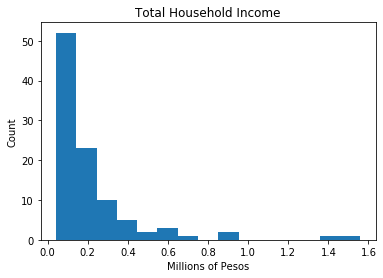

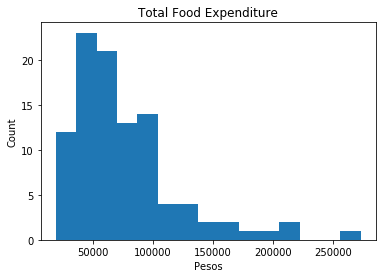

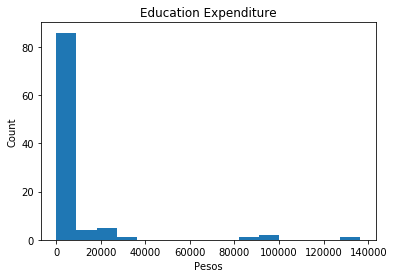

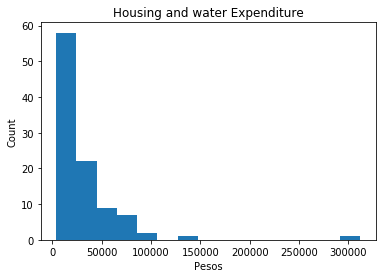

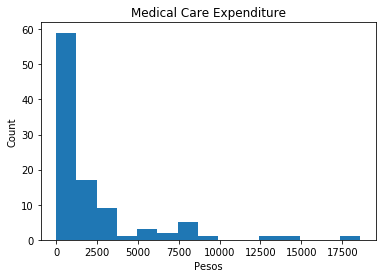

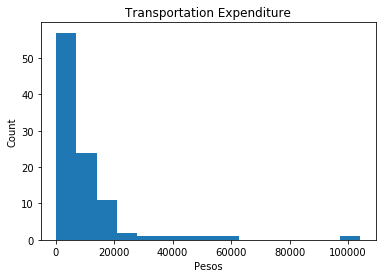

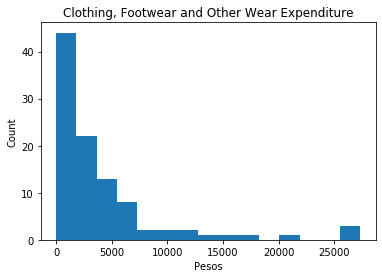

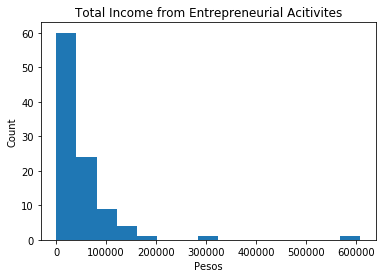

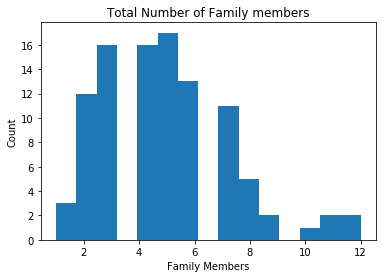

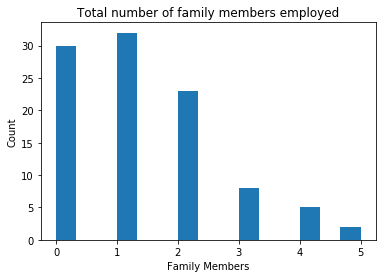

In [65]:
for i in df_01.columns:
    fig, ax = plt.subplots()
    if i == 'Total Household Income':
        ax.hist(df[i]/1000000, bins=15)
        ax.set_xlabel('Millions of Pesos')
    elif i == 'Total Number of Family members' or i == 'Total number of family members employed':
        ax.hist(df[i], bins=15)
        ax.set_xlabel('Family Members')
    else:
        ax.hist(df[i], bins=15)
        ax.set_xlabel('Pesos')
       
    ax.set_title(i)
    ax.set_ylabel('Count')
    plt.show()

 ##  $$ ============      MILESTONE 02      ============ $$

### 2.1 - Calcule com 95 % de confiança a média de dinheiro gasto com saúde e educação.

##### $$ -----  SAÚDE  ----- $$

In [20]:
mean_saude = df['Medical Care Expenditure'].mean()
std_saude = df['Medical Care Expenditure'].std()

mean_saude, std_saude

(2130.16, 3242.431668617947)

In [21]:
norm.ppf(0.025,mean_saude,std_saude/10), norm.ppf(0.975,mean_saude,std_saude/10)

(1494.655070717671, 2765.6649292823286)

### ---> Com base nestes resultados, podemos afirmar que a média $\overline x$:

### $$ 1,494.66 < \overline x < 2,765.66 $$

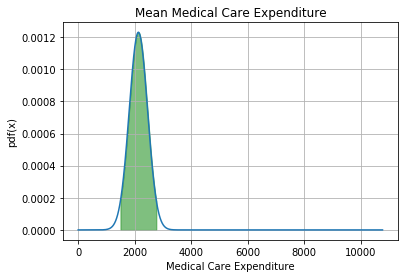

In [22]:
fig, ax = plt.subplots()
x = np.arange(0, norm.ppf(0.975,mean_saude,std_saude/10) + 8000, 0.01)
ax.plot(x, norm.pdf(x,mean_saude,std_saude/10))
ax.set_title('Mean Medical Care Expenditure')
ax.set_xlabel('Medical Care Expenditure')
ax.set_ylabel('pdf(x)')
ax.grid(True)

px=np.arange(norm.ppf(0.025,mean_saude,std_saude/10),norm.ppf(0.975,mean_saude,std_saude/10))
ax.fill_between(px,norm.pdf(px,mean_saude,std_saude/10),alpha=0.5, color='g')

plt.show()

##### $$ -----  EDUCAÇÃO  ----- $$

In [23]:
mean_educacao = df['Education Expenditure'].mean()
std_educacao = df['Education Expenditure'].std()

mean_educacao, std_educacao

(6973.18, 20702.20472589158)

In [24]:
norm.ppf(0.025, mean_educacao, std_educacao/10), norm.ppf(0.975, mean_educacao, std_educacao/10)

(2915.6224336677597, 11030.73756633224)

### ---> Com base nestes resultados, podemos afirmar que a média $\overline x$:

### $$ 2,915.62 < \overline x < 11,030.74 $$

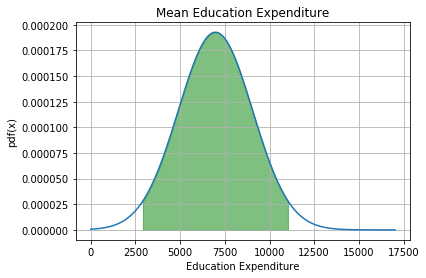

In [25]:
fig, ax = plt.subplots()
x = np.arange(0,norm.ppf(0.975, mean_educacao, std_educacao/10) + 6000, 0.01)
ax.plot(x, norm.pdf(x, mean_educacao, std_educacao/10))
ax.set_title('Mean Education Expenditure')
ax.set_xlabel('Education Expenditure')
ax.set_ylabel('pdf(x)')
ax.grid(True)

px=np.arange(norm.ppf(0.025, mean_educacao, std_educacao/10), norm.ppf(0.975, mean_educacao, std_educacao/10))
ax.fill_between(px,norm.pdf(px,mean_educacao,std_educacao/10),alpha=0.5, color='g')

plt.show()

### 2.2 - Calcule se há diferença na média do número de membros de uma família pelo sexo do chefe de família, com 95 % de confiança.

In [26]:
df_male = df[df['Household Head Sex']== 'Male']['Total Number of Family members']
df_female = df[df['Household Head Sex']== 'Female']['Total Number of Family members']

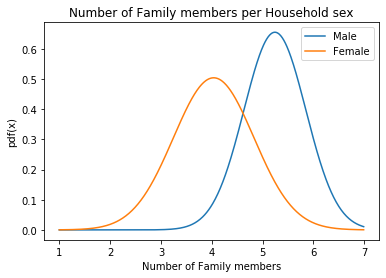

In [27]:
fig, ax = plt.subplots()
x = np.arange(1, 7, 0.01)

plt.plot(x, norm.pdf(x, df_male.mean(), df_male.mean()/np.sqrt(len(df_male))), label='Male')

plt.plot(x, norm.pdf(x, df_female.mean(), df_female.mean()/np.sqrt(len(df_female))), label='Female')

ax.set_title('Number of Family members per Household sex')
ax.set_xlabel('Number of Family members')
ax.set_ylabel('pdf(x)')

ax.legend()


plt.show()

### <center> 1º PASSO - Analisando as variâncias das amostras <center>

$H_0$ - amostras de mesma variância

$H_1$ - amostras de variâncias diferentes

Intervalo de confiança de 95% 

In [28]:
w = (df_male.var()/df_female.var())
w

1.1519963238397906

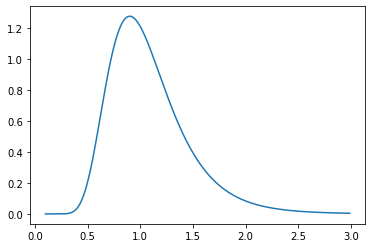

In [29]:
x = np.arange(0.1, 3, 0.01)
plt.plot(x, f.pdf(x, len(df_male) - 1, len(df_female) - 1))
plt.show()

In [57]:
1 - f.cdf(w, len(df_male) - 1, len(df_female) - 1)

0.12575054537550023

### Como: 

### $$ 0.025 < pvalor < 0.975 $$

### ---> Então, não existe diferença estatisticamente significativa entre as médias


### <center> 2º PASSO - Analisando as médias </center>

$H_0$ - amostras de mesma média

$H_1$ - amostras de médias diferentes

Intervalo de confiança de 95% 

In [31]:
xa = df_male.mean()
Sa = df_male.std()
n = len(df_male)

xb = df_female.mean()
Sb = df_female.std()
m = len(df_female)

In [32]:
# Variâncias Diferentes

A = (Sa**2)/n
B = (Sb**2)/m

dof = ((A + B)**2)/((A**2)/(n-1) + (B**2)/(m-1))

x = (xa - xb)/(np.sqrt(A+B))

In [33]:
# Variâncias Semelhantes

dof = n+m-2
Sp = np.sqrt(((n-1)*(Sa)**2 + (m-1)*(Sb)**2)/dof)
x = (xa - xb)/(Sp*np.sqrt((1/n)+(1/m)))

In [34]:
x

2.2584236664264656

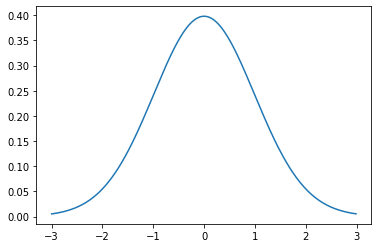

In [35]:
tes = np.arange(-3, 3, 0.01)
plt.plot(tes, t.pdf(tes, dof))
plt.show()

In [36]:
1-t.cdf(x, dof)

0.013068103082253701

### Como:

### $$ 0.025 < pvalor < 0.975 $$

### ---> Então, não existe diferença estatisticamente significativa entre as médias

In [37]:
# conferindo... os resultados são os mesmos, mas o pvalor chega próximo (0.12 - 0.13)
ttest_ind(df_male, df_female)

Ttest_indResult(statistic=2.258423666426466, pvalue=0.0261362061645075)

### 2.3 - Calcule se há diferença na média total de renda da família (total household Income) de acordo com a fonte salarial (main source of income).

In [38]:
df_salario = df[df['Income Source'] == 'Salary']['Total Household Income']
df_outro = df[df['Income Source'] == 'Other']['Total Household Income']

In [39]:
xa = df_salario.mean()
Sa = df_salario.std()
n = len(df_salario)

xb = df_outro.mean()
Sb = df_outro.std()
m = len(df_outro)

xa, xb, Sa, Sb

(274576.17647058825, 169323.5918367347, 261645.08405943392, 213162.71823802023)

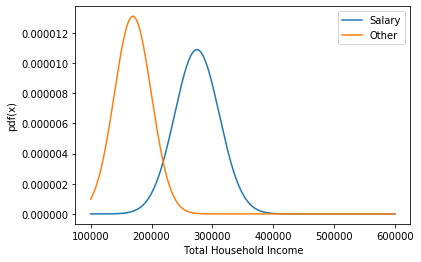

In [40]:
fig, ax = plt.subplots()
x = np.arange(100000, 600000, 10)
y1 = norm.pdf(x, xa, Sa/np.sqrt(n))
y2 = norm.pdf(x, xb, Sb/np.sqrt(m))

plt.plot(x, y1, label='Salary')
plt.plot(x, y2, label='Other')

#ax.set_title('Total Household Income')
ax.set_xlabel('Total Household Income')
ax.set_ylabel('pdf(x)')

plt.legend()

plt.show()

### <center> 1º PASSO - Analisando as variâncias das amostras <center>

$H_0$ - amostras de mesma variâncias

$H_1$ - amostras de variâncias diferentes

Intervalo de confiança de 95% 

In [41]:
w = (Sa**2)/(Sb**2)
w

1.5066162917288723

In [42]:
# região crítica valor maior que 1.75
rc = f.ppf(0.975, n-1, m-1)
rc

1.765324503088776

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:1680: RuntimeWarning: divide by zero encountered in log
  lPx = m/2 * np.log(m) + n/2 * np.log(n) + (n/2 - 1) * np.log(x)


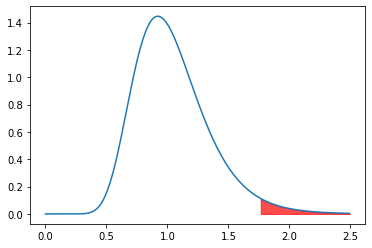

In [43]:
x = np.arange(0,2.5, 0.01)
plt.plot(x, f.pdf(x, n-1, m-1))
plt.fill_between(np.arange(rc,2.5, 0.01), f.pdf(np.arange(rc,2.5, 0.01), n-1, m-1),alpha=0.7, color='r')
plt.show()

In [44]:
1 - f.cdf(w, n-1, m-1) # p_valor < que 0.025  --> descartamos H_o

0.0780797104269435

### Como: 

### $$ pvalor < 0.025 $$ 

### ---> Então, rejeitamos a hipótese nula.

### <center> 2º PASSO - Analisando as médias <center>

$H_0$ - amostras de mesma média (mesma população)

$H_1$ - amostras de médias diferentes (populações diferentes)

Intervalo de confiança de 95% 

In [45]:
# Variâncias Diferentes

A = (Sa**2)/n
B = (Sb**2)/m

dof = ((A + B)**2)/((A**2)/(n-1) + (B**2)/(m-1))

x = (xa - xb)/(np.sqrt(A+B))

In [46]:
1 - t.cdf(x, dof) # p-valor < 0.025 --> Descartamos H_o

0.01477232763312919

### Como:

### $$ pvalor < 0.025 $$

### ---> Então, existe diferença estatisticamente significativa entre as médias.

In [47]:
# Comparando
ttest_ind(df_salario, df_outro)

Ttest_indResult(statistic=2.2002999333597897, pvalue=0.030134848545626983)

 ##  $$ ============      MILESTONE 03      ============ $$

### 3.1 - Diga se há relação entre os indicadores entre o chefe de família estar empregado ou não com a escolaridade.

In [48]:
tab = pd.crosstab(df['Household Head Job or Business Indicator'], df['Schoolarship'])
print(tab)

Schoolarship                              Fundamental  Medio  Superior
Household Head Job or Business Indicator                              
No Job/Business                                    13      3         4
With Job/Business                                  26     44        10


In [49]:
corr = np.array([[10, 4, 6],[29 , 27, 24]])

In [50]:
stats, pvalor, dof, exp = chi2_contingency(corr)

In [51]:
exp

array([[ 7.8,  6.2,  6. ],
       [31.2, 24.8, 24. ]])

In [52]:
pvalor

0.41656042968208207

### Como:

### $$ pvalor > 0.05 $$

### ---> Então, não rejeitamos $H_0$ e podemos dizer que os indicadores são independentes. Desta forma, estar ou não trabalhando não depende do grau de escolaridade